In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Customer-Churn-Prediction.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

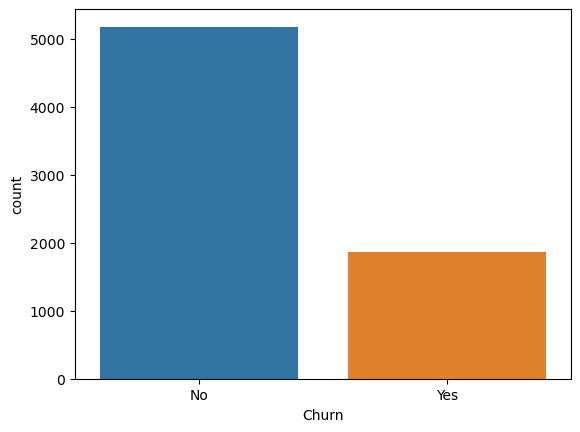

In [12]:
sns.countplot(x='Churn', data=data,width=0.8)

In [13]:
churned = data[data.Churn == 'Yes'].shape[0]
retained = data[data.Churn == 'No'].shape[0]

In [14]:
churned_per_person = (churned/(churned + retained)) * 100

In [15]:
churned_per_person

26.536987079369588

In [16]:
retained_per_person = (retained/(churned + retained)) * 100

In [17]:
retained_per_person

73.4630129206304

In [18]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


***data visualization***

<Axes: xlabel='gender', ylabel='count'>

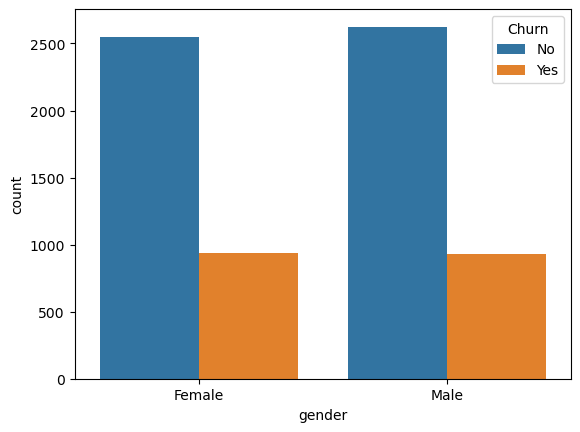

In [20]:
sns.countplot(x = 'gender', hue='Churn', data=data)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

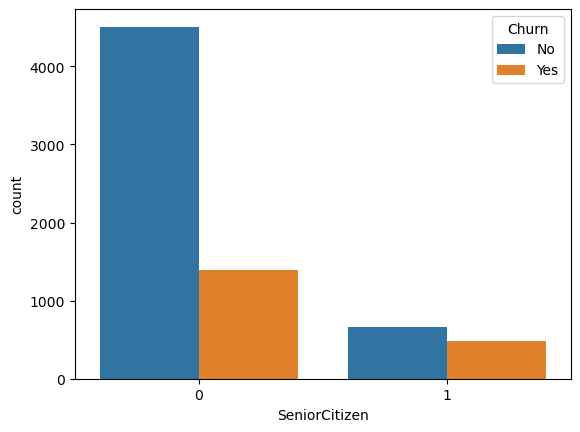

In [21]:
sns.countplot(x = 'SeniorCitizen', hue='Churn', data=data)

<Axes: xlabel='Contract', ylabel='count'>

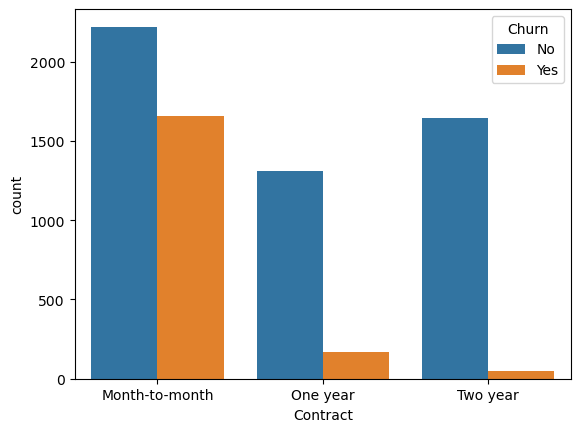

In [22]:
sns.countplot(x = 'Contract', hue='Churn', data=data)

<Axes: xlabel='PhoneService', ylabel='count'>

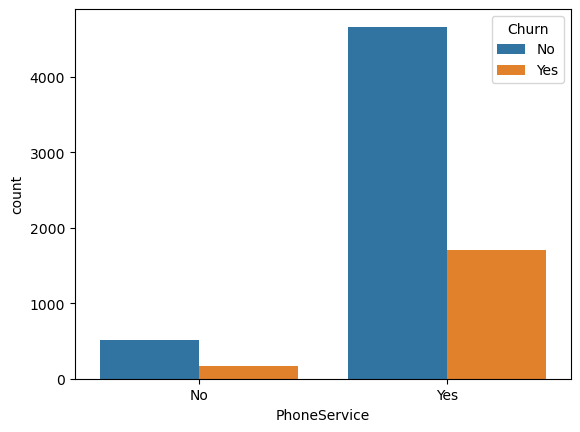

In [24]:
sns.countplot(x = 'PhoneService', hue='Churn', data=data) 

<Axes: xlabel='MultipleLines', ylabel='count'>

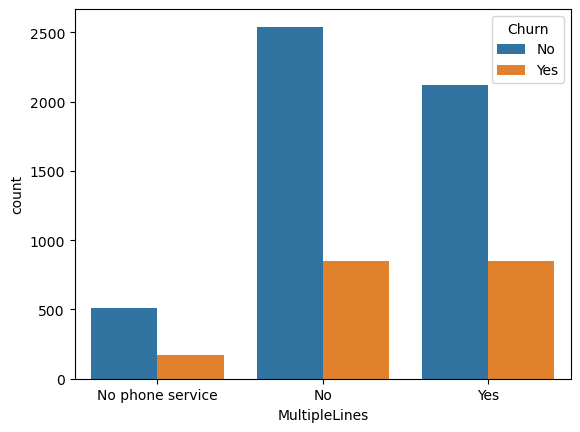

In [25]:
sns.countplot(x = 'MultipleLines', hue='Churn', data=data)

***data Preprocessing***

In [27]:
data = data.drop('customerID', axis=1)

In [28]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
data.shape

(7043, 20)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [37]:
for column in data.columns:
    if np.issubdtype(data[column].dtype, np.number):
        continue

    data[column] = LabelEncoder().fit_transform(data[column])

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [39]:
x = data.drop('Churn', axis=1)

In [41]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [42]:
y = data['Churn']

In [43]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

***scalling the dataset***

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
feature_x = StandardScaler().fit_transform(x)

***data split***

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(feature_x, y, test_size=0.3, random_state=11)

In [50]:
xtrain

array([[-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
         0.04115632,  0.46342512],
       [-1.00955867, -0.44014635, -0.96662231, ..., -0.53774716,
         0.35523595, -0.09890826],
       [-1.00955867, -0.44014635, -0.96662231, ..., -0.53774716,
        -1.50930029, -0.37636842],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
         1.38721189,  1.29951214],
       [ 0.99053183,  2.27197156, -0.96662231, ...,  0.39855772,
         1.11800077,  0.16902083],
       [-1.00955867, -0.44014635,  1.03453023, ..., -1.47405205,
        -1.47107896, -1.24369618]])

In [51]:
xtest

array([[-1.00955867,  2.27197156, -0.96662231, ...,  0.39855772,
         0.8820256 , -1.62546866],
       [ 0.99053183, -0.44014635,  1.03453023, ...,  0.39855772,
         0.83050989,  0.90662008],
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.18691167, -1.44490775],
       ...,
       [-1.00955867,  2.27197156, -0.96662231, ..., -0.53774716,
         1.214385  ,  0.79913074],
       [-1.00955867, -0.44014635,  1.03453023, ..., -1.47405205,
        -1.49434411, -0.70201346],
       [-1.00955867,  2.27197156,  1.03453023, ...,  1.33486261,
        -0.13499417, -1.16691808]])

***Import Logistic Regression***

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [55]:
pred = model.predict(xtest)

In [56]:
pred

array([1, 1, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
score = accuracy_score(ytest, pred)

In [59]:
score

0.7974443918599148

In [60]:
confusion_matrix(ytest, pred)

array([[1394,  147],
       [ 281,  291]], dtype=int64)

In [62]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.87      1541\n           1       0.66      0.51      0.58       572\n\n    accuracy                           0.80      2113\n   macro avg       0.75      0.71      0.72      2113\nweighted avg       0.79      0.80      0.79      2113\n'